Purpose of this notebook is to determine best architecturefor cnn

In [1]:
!pip install --user --upgrade tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 78.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import tensorflow_model_optimization as tfmot
import tempfile
import keras

MODEL_FILE_NAME = 'model_test1'
MODEL_FILE_EXT = 'h5'

# making directory if necessairy
!mkdir /content/gdrive/My\ Drive/Colab_Models/

Mounted at /content/gdrive
mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab_Models/’: File exists


In [2]:
def load_data():
  # loading the data
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


  # normalization to [0;1] range
  train_images, test_images = train_images / 255.0, test_images / 255.0

  #names of classes
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',  'dog', 'frog', 'horse', 'ship', 'truck']
  return train_images, train_labels, test_images, test_labels, class_names

def print_result(labels, array_of_history):
  #showing example figures
  plt.figure(figsize=(10,10))
  for i in range(len(labels)):
      plt.subplot(5,5,i+1)
      history = array_of_history[i]
      plt.plot(history.history['accuracy'], label='accuracy')
      plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.ylim([0.5, 1])
      plt.legend(loc='lower right')
      plt.title(labels[i])
  plt.show()

In [3]:
def train_model(model, train_images, train_labels, test_images, test_labels, class_names, epochs = 10):
  model.summary()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  history = model.fit(train_images, train_labels, epochs=10,
                      validation_data=(test_images, test_labels))
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  return history, test_loss, test_acc

In [4]:
def train_tests(tests_desc,labels,file_mixin):
  train_images, train_labels, test_images, test_labels, class_names = load_data()
  histories = []
  eval_results = []
  for architecture,label in zip(tests_desc,labels):
    model = models.Sequential(architecture)
    history, test_loss, test_acc = train_model(model, train_images, train_labels, test_images, test_labels, class_names, epochs = 10)
    histories+=[history]
    eval_results+=[{"loss":test_loss,"accuracy":test_acc}]
    model.save('/content/gdrive/My Drive/Colab_Models/'+MODEL_FILE_NAME+'_'+label+'_'+file_mixin+'_.'+MODEL_FILE_EXT)
  return histories, eval_results

def run_tests(tests_desc,labels,file_mixin):
  histories, eval_results = train_tests(tests_desc,labels,file_mixin)
  print_result(labels,histories)
  print(eval_results)


below setting of experiments are presented

In [5]:
model_archs = [
    [
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(.5),
        layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(10, activation='softmax')
    ]
]
alabels = ["arch9"]

running

170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 607s 387ms/step - loss: 1.5557 - accuracy: 0.4215 - val_loss: 1.2838 - val_accuracy: 0.5364
Epoch 2/10
1563/1563 [==============================] - 619s 396ms/step - loss: 1.0673 - accuracy: 0.6215 - val_loss: 0.9829 - val_accuracy: 0.6543
Epoch 3/10
1563/1563 [==============================] - 622s 398ms/step - loss: 0.8512 - accuracy: 0.7031 - val_loss: 0.8715 - val_accuracy: 0.7015
Epoch 4/10
1563/1563 [==============================] - 609s 389ms/step - loss: 0.7222 - accuracy: 0.7494 - val_loss: 0.7647 - val_accuracy: 0.7390
Epoch 5/10
1563/1563 [==============================] - 624s 400ms/step - loss: 0.6369 - accuracy: 0.7785 - val_loss: 0.7883 - val_accuracy: 0.7370
Epoch 6/10
1563/1563 [==============================] - 615s 394ms/step - loss: 0.5736 - accuracy: 0.8029 - val_loss: 0.7319 - val_accuracy: 0.7601
Epoch 7/10
1563/1563 [==============================] - 633s 405ms/step - loss: 0.5230 - accuracy: 0.8186 - val_loss: 0.780

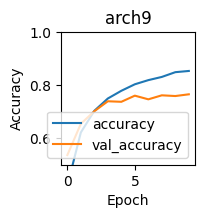

[{'loss': 0.747298002243042, 'accuracy': 0.7652000188827515}]


In [6]:
run_tests(model_archs,alabels,"run1")